In [13]:
#Loading the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [5]:
url= 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# Assign col names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

#read the dataset
dataset=pd.read_csv(url, names=names)

In [6]:
#Preprocessing
#splitting the data into x(attributes) and y(label)
#The X variable contains the first four columns of the dataset
#y contains the labels.

x=dataset.iloc[:, :-1].values #the iloc takes [row, col] --> so all rows and only 4 col.
y=dataset.iloc[:, 4].values #just the 5th col.

In [7]:
#Train Test Split
#In order to prevent overfitting we need to divide the data into training and testing as usual.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [9]:
#Feature Scaling
scaler= StandardScaler()
scaler.fit (x_train)

x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [11]:
#Training and Predictions

classifier= KNeighborsClassifier(n_neighbors=5) #the value for k here is 5
#K doesnt have an ideal value. It is selected after testing and evaluation
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
#make prediction
y_predict=classifier.predict(x_test)

AxesSubplot(0.125,0.125;0.62x0.755)
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.79      1.00      0.88        11
 Iris-virginica       1.00      0.62      0.77         8

      micro avg       0.90      0.90      0.90        30
      macro avg       0.93      0.88      0.88        30
   weighted avg       0.92      0.90      0.89        30



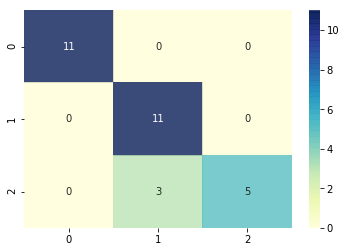

In [18]:
#Evaluating the Algorithm

print(sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='d', cmap='YlGnBu', alpha=0.8, vmin=0))
print(classification_report(y_test, y_predict))

Text(0, 0.5, 'Mean Error')

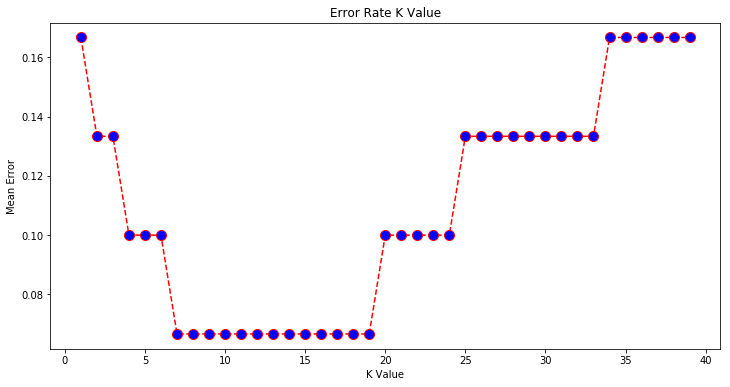

In [19]:
#Comparing Error Rate with the K Value
#Let's try changing K to see if we get better results
"One way to help you find the best value of K is to plot the graph of K value and the corresponding error rate for the dataset."
#plotting the mean error for the predicted values of test set for all the K values between 1 and 40.

#calculating the mean of error for all of the predicted values (K: 1-40)
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

#In each itiration the mean error for predicted values of test set is calculated and added to the 'error' list

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')